In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
crowdfunding_2018 = pd.read_csv('ks-projects-201801.csv')

crowdfunding_2018

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


In [4]:
clean_crowdfunding_2018 = crowdfunding_2018.drop(['name', 'goal', 'pledged', 'usd pledged'], axis=1)

pd.options.display.float_format = "{:,.2f}".format

clean_crowdfunding_2018['launched'] = pd.to_datetime(clean_crowdfunding_2018['launched']).dt.date
clean_crowdfunding_2018['usd_pledged_real'] = clean_crowdfunding_2018['usd_pledged_real'].round(2)

clean_crowdfunding_2018

,ID,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,Poetry,Publishing,GBP,2015-10-09,2015-08-11,failed,0,GB,0.00,"1,533.95"
1,1000003930,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02,failed,15,US,"2,421.00","30,000.00"
2,1000004038,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12,failed,3,US,220.00,"45,000.00"
3,1000007540,Music,Music,USD,2012-04-16,2012-03-17,failed,1,US,1.00,"5,000.00"
4,1000011046,Film & Video,Film & Video,USD,2015-08-29,2015-07-04,canceled,14,US,"1,283.00","19,500.00"
...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,Documentary,Film & Video,USD,2014-10-17,2014-09-17,canceled,1,US,25.00,"50,000.00"
378657,999977640,Narrative Film,Film & Video,USD,2011-07-19,2011-06-22,failed,5,US,155.00,"1,500.00"
378658,999986353,Narrative Film,Film & Video,USD,2010-08-16,2010-07-01,failed,1,US,20.00,"15,000.00"
378659,999987933,Technology,Technology,USD,2016-02-13,2016-01-13,failed,6,US,200.00,"15,000.00"


### Problématique : "Quels sont les facteurs déterminants du succès des projets sur Kickstarter ?"
  * I/ influence de la catégorie du projet sur son succès
  * II/ effet de la période de lancement sur le succès
  * III/ impact du pays d'origine sur le succès du projet
  * Bonus : impact du nombre de contributeurs sur le succès du projet (à réflechir)

In [7]:
print(f"Premières lignes : \n{clean_crowdfunding_2018.head()}")
print(f"Fin du dataframe : \n{clean_crowdfunding_2018.tail()}")
print(f"Informations sur le dataframe : \n{clean_crowdfunding_2018.info()}")

print(f"Dimensions du dataframe : {clean_crowdfunding_2018.shape}", f"\nNombre de lignes : {clean_crowdfunding_2018.shape[0]}", f"\nNombre de colonnes : {clean_crowdfunding_2018.shape[1]}")
print(f"Nombre et types d'entités : \n{clean_crowdfunding_2018.dtypes}")

print(f"Statistiques descriptives : \n{clean_crowdfunding_2018.describe()}")

Premières lignes : 
           ID        category main_category currency    deadline    launched  \
0  1000002330          Poetry    Publishing      GBP  2015-10-09  2015-08-11   
1  1000003930  Narrative Film  Film & Video      USD  2017-11-01  2017-09-02   
2  1000004038  Narrative Film  Film & Video      USD  2013-02-26  2013-01-12   
3  1000007540           Music         Music      USD  2012-04-16  2012-03-17   
4  1000011046    Film & Video  Film & Video      USD  2015-08-29  2015-07-04   

      state  backers country  usd_pledged_real  usd_goal_real  
0    failed        0      GB              0.00       1,533.95  
1    failed       15      US          2,421.00      30,000.00  
2    failed        3      US            220.00      45,000.00  
3    failed        1      US              1.00       5,000.00  
4  canceled       14      US          1,283.00      19,500.00  
Fin du dataframe : 
               ID         category main_category currency    deadline  \
378656  999976400     

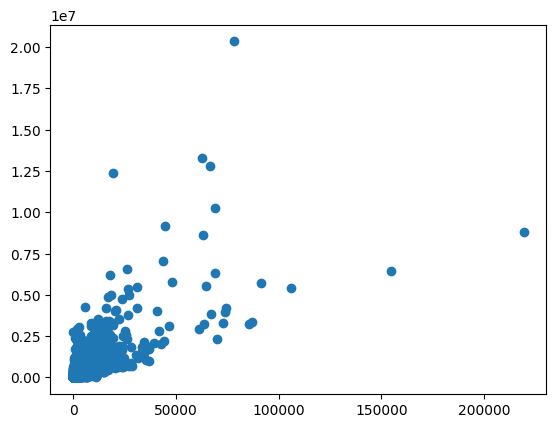

In [5]:
plt.scatter(clean_crowdfunding_2018['backers'], clean_crowdfunding_2018['usd_pledged_real'])
plt.show()

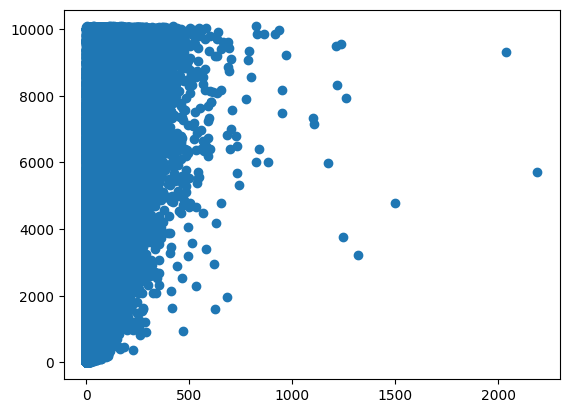

In [17]:
# Calcul de Q1, Q3, et de l'IQR pour la variable 'pledged'
Q1 = clean_crowdfunding_2018['usd_pledged_real'].quantile(0.25)
Q3 = clean_crowdfunding_2018['usd_pledged_real'].quantile(0.75)
IQR = Q3 - Q1

# Définition des bornes pour les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrage des valeurs aberrantes
clean_crowdfunding_2018_filtered = clean_crowdfunding_2018[(clean_crowdfunding_2018['usd_pledged_real'] >= lower_bound) & (clean_crowdfunding_2018['usd_pledged_real'] <= upper_bound)]

# Affichage des résultats
plt.scatter(clean_crowdfunding_2018_filtered['backers'], clean_crowdfunding_2018_filtered['usd_pledged_real'])
plt.show()